In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import gym
from scipy.io import loadmat
from multiworld.envs.pygame import register_custom_envs
import matplotlib.pyplot as plt
import numpy as np

register_custom_envs()

In [3]:
env = gym.make("PointmassUWallTrainEnvBig-v1")

data = loadmat(
    "/home/vitchyr/git/handful-of-trials/log/pointmass-u-wall-solve-in-4-sweep-log-railrl-style/2019-07-03--12:02:51/debug_log/2019-07-09--13:55:46/train_iter1/predictions.mat"
)

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
data.keys()

dict_keys(['__globals__', '__header__', '__version__', 'actions', 'predictions'])

In [5]:
print(data['predictions'].shape)
print(data['actions'].shape)


(8, 5, 20, 4)
(8, 8)


In [6]:
actions_seqs = data['actions']
preds_seqs_and_particles = data['predictions']

t = 0
state_particles = preds_seqs_and_particles[t][:, :, :2]
actions = actions_seqs[t]
actions = actions.reshape(4, 2)

In [7]:
print(actions.shape)
print(state_particles.shape)
print(actions)

(4, 2)
(5, 20, 2)
[[-0.22639053  0.54214907]
 [-0.0291595  -0.36861137]
 [ 0.15657417  0.09962452]
 [-0.46034595  0.23063213]]


[ 3.051032  -3.1262753] [ 2.7323475 -2.9072113]
[ 3.051032  -3.1262753] [ 2.9973142 -2.3333647]
[ 3.051032  -3.1262753] [ 3.253183  -3.0094304]
[ 3.051032  -3.1262753] [ 3.0931394 -2.9423842]
[ 3.051032  -3.1262753] [ 0.8130522 -3.076212 ]
[ 3.051032  -3.1262753] [ 2.3671808 -2.7406275]
[ 3.051032  -3.1262753] [ 2.9017944 -1.1596372]
[ 3.051032  -3.1262753] [ 2.5653536 -3.0549722]


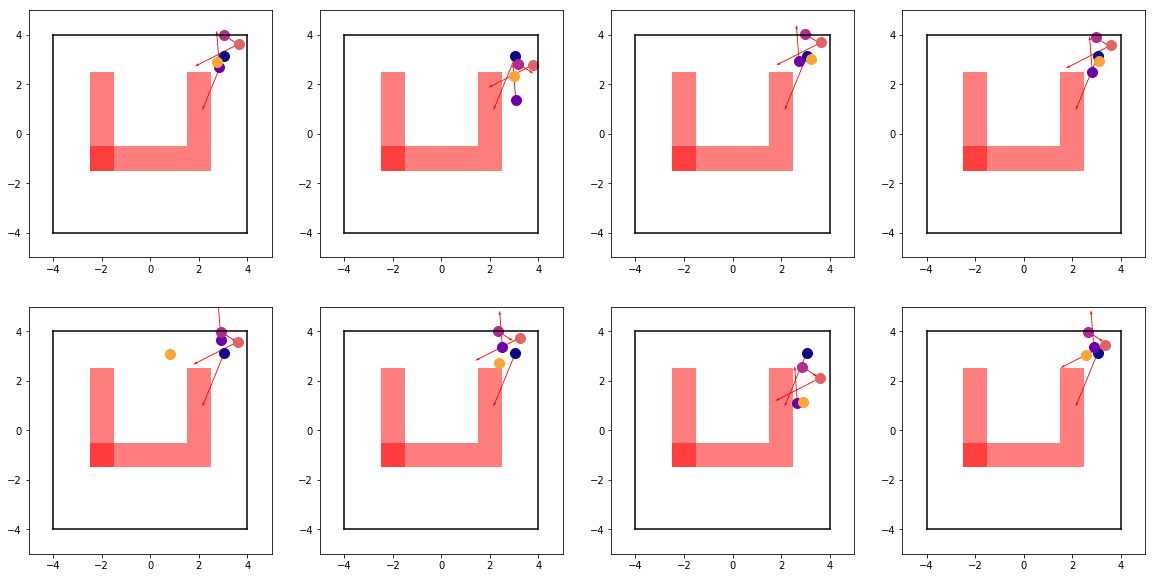

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))
for i in range(8):
    r = i // 4
    c = i % 4
    ax = axes[r][c]
    states = state_particles[:, i, :]
    print(states[0], states[-1])
    env.plot_trajectory(ax, states, actions)

In [9]:
print(states.shape)

(5, 2)


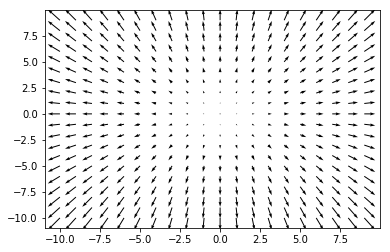

In [10]:
X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()